In [1]:
import numpy as np
from  sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=load_iris()
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df= pd.DataFrame(data.data,columns=data.feature_names)

In [5]:
df['target']=data.target


In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import export_graphviz
from six import StringIO

In [8]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [9]:
x=df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
y=df.target

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100,shuffle=False)
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
115,6.4,3.2,5.3,2.3
116,6.5,3.0,5.5,1.8
117,7.7,3.8,6.7,2.2
118,7.7,2.6,6.9,2.3


In [11]:
dct=DecisionTreeClassifier()
dct.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred_train=dct.predict(x_train)

In [13]:
print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        20

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [14]:
y_test_pred=dct.predict(x_test)
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.73      1.00      0.85        22

    accuracy                           0.73        30
   macro avg       0.37      0.50      0.42        30
weighted avg       0.54      0.73      0.62        30



C:\Users\ASUS\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
print(confusion_matrix(y_pred_train,y_train))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 20]]


In [16]:
print(confusion_matrix(y_test_pred,y_test))

[[ 0  8]
 [ 0 22]]


test_accuracy and train_accuracy is not same thats mean model is overfitted

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_fold=5
parameters={'max_depth':range(1,10)}

In [18]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=100)
tree=GridSearchCV(dtree,parameters,cv=n_fold,scoring='accuracy',return_train_score=True)
tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [19]:
scores= tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003130,0.006261,0.001303,0.002605,1,{'max_depth': 1},0.833333,0.833333,0.833333,0.833333,...,0.833333,0.000000,9,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.000000
1,0.003232,0.006465,0.003126,0.006253,2,{'max_depth': 2},1.000000,0.958333,0.916667,0.916667,...,0.950000,0.031180,7,0.968750,0.979167,0.989583,0.979167,0.979167,0.979167,0.006588
2,0.003121,0.006242,0.004323,0.005949,3,{'max_depth': 3},1.000000,0.958333,0.916667,0.916667,...,0.950000,0.031180,7,0.968750,0.989583,0.989583,0.979167,0.979167,0.981250,0.007795
3,0.003125,0.006251,0.000000,0.000000,4,{'max_depth': 4},1.000000,0.958333,0.916667,0.958333,...,0.958333,0.026352,1,1.000000,1.000000,1.000000,0.989583,1.000000,0.997917,0.004167
4,0.001303,0.002605,0.006257,0.007663,5,{'max_depth': 5},1.000000,0.958333,0.916667,0.958333,...,0.958333,0.026352,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


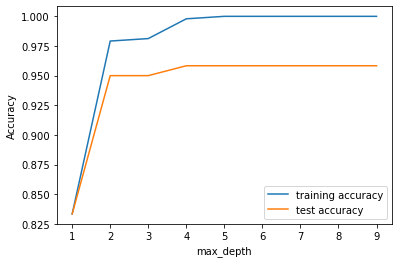

In [20]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [21]:
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 40, 3)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(x_train, y_train)
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003126,0.006252,0.000000,0.000000,1,{'min_samples_leaf': 1},1.0,0.958333,0.916667,0.958333,...,0.958333,0.026352,2,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000000,0.000000,0.003126,0.006252,4,{'min_samples_leaf': 4},1.0,0.958333,0.916667,0.916667,...,0.950000,0.031180,3,0.96875,0.979167,0.989583,0.979167,0.979167,0.979167,0.006588
2,0.003126,0.006253,0.000000,0.000000,7,{'min_samples_leaf': 7},1.0,0.958333,0.916667,0.916667,...,0.950000,0.031180,3,0.96875,0.979167,0.989583,0.979167,0.979167,0.979167,0.006588
3,0.006252,0.007657,0.000000,0.000000,10,{'min_samples_leaf': 10},1.0,0.958333,0.916667,0.916667,...,0.950000,0.031180,3,0.96875,0.979167,0.989583,0.979167,0.979167,0.979167,0.006588
4,0.000000,0.000000,0.007565,0.007014,13,{'min_samples_leaf': 13},1.0,0.958333,0.916667,0.916667,...,0.950000,0.031180,3,0.96875,0.979167,0.989583,0.979167,0.979167,0.979167,0.006588


KeyError: 'param_min_samples_split'

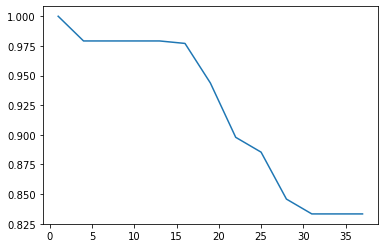

In [22]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(3, 40, 3)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(x_train, y_train)
scores = tree.cv_results_
pd.DataFrame(scores).head()
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 40, 2),
    'min_samples_split': range(2, 30, 2),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
iristree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = iristree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
iristree1 = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=4, 
                                  min_samples_leaf=3,
                                  min_samples_split=2)
iristree1.fit(x_train, y_train)


In [ ]:
iristree1.score(x_test,y_test)